# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Joanna Farris

GitHub repo: [https://github.com/Pojetta/module-07](https://github.com/Pojetta/module-07)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Setup and register custom sentiment extensions

In [84]:
import json  
import pathlib  
import pickle  
from collections import Counter
import numpy as np  
  
import requests  
from bs4 import BeautifulSoup  
import matplotlib.pyplot as plt  
import spacy  
from spacy.tokens import Doc  
from spacytextblob.spacytextblob import SpacyTextBlob

In [ ]:
nlp = spacy.load("en_core_web_sm")  
nlp.add_pipe("spacytextblob")

In [86]:
if not Doc.has_extension("polarity"):  
    Doc.set_extension("polarity", getter=lambda doc: doc._.blob.sentiment.polarity)  
  
if not Doc.has_extension("subjectivity"):  
    Doc.set_extension("subjectivity", getter=lambda doc: doc._.blob.sentiment.subjectivity)  
  
if not Doc.has_extension("assessments"):  
    Doc.set_extension("assessments", getter=lambda doc: doc._.blob.sentiment_assessments.assessments)

## Question 1
Q: Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [87]:
# Fetch the article HTML from the web
url = "https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/"
response = requests.get(url)

# Save the article HTML to a pickle file
with open("chatgpt_article.pkl", "wb") as f:
    pickle.dump(response.text, f)

print("Article: What is ChatGPT Doing and Why Does It Work?")

Article: What is ChatGPT Doing and Why Does It Work?


## Question 2
Q: Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [88]:
# Load the article HTML from the pickle file
with open("chatgpt_article.pkl", "rb") as f:
    html = pickle.load(f)

# Parse the HTML to extract the article text
soup = BeautifulSoup(html, "html.parser")
article_element = soup.find("div", class_="post_content")
article_text = article_element.get_text(strip=True, separator="\n")

# Load the article text into a trained spaCy pipeline
doc = nlp(article_text)

# Print sentiment polarity
print(f"Polarity score of article: {doc._.polarity:.3f}")

# Print number of sentences
sentences = list(doc.sents)
print(f"Number of sentences in article: {len(sentences)}")

Polarity score of article: 0.096
Number of sentences in article: 855


## Question 3
Q: Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [ ]:
# Define filter
def we_care_about(token):
    return (
        not token.is_space
        and not token.is_punct
        and not token.is_stop
        and token.is_alpha
        and len(token.text) > 2
    )

# Count tokens
tokens = [token.text.lower() for token in doc if we_care_about(token)]
token_freq = Counter(tokens)
top_tokens = token_freq.most_common(5)

# Print top 5 most common tokens
print("Top 5 Most Common Tokens in Article:")
for word, count in top_tokens:
    print(f"{word}: {count}")


Top 5 Most Common Tokens in Article:
neural: 170
net: 136
chatgpt: 125
like: 121
language: 89


## Question 4
Q: Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [91]:
# Count lemmas
lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(lemmas)
top_lemmas = lemma_freq.most_common(5)

# Print top 5 most common tokens
print("Top 5 Most Common Lemmas in Article:")
for word, count in top_lemmas:
    print(f"{word}: {count}")


Top 5 Most Common Lemmas in Article:
net: 180
neural: 170
chatgpt: 125
like: 122
word: 115


## Question 5
Q: Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

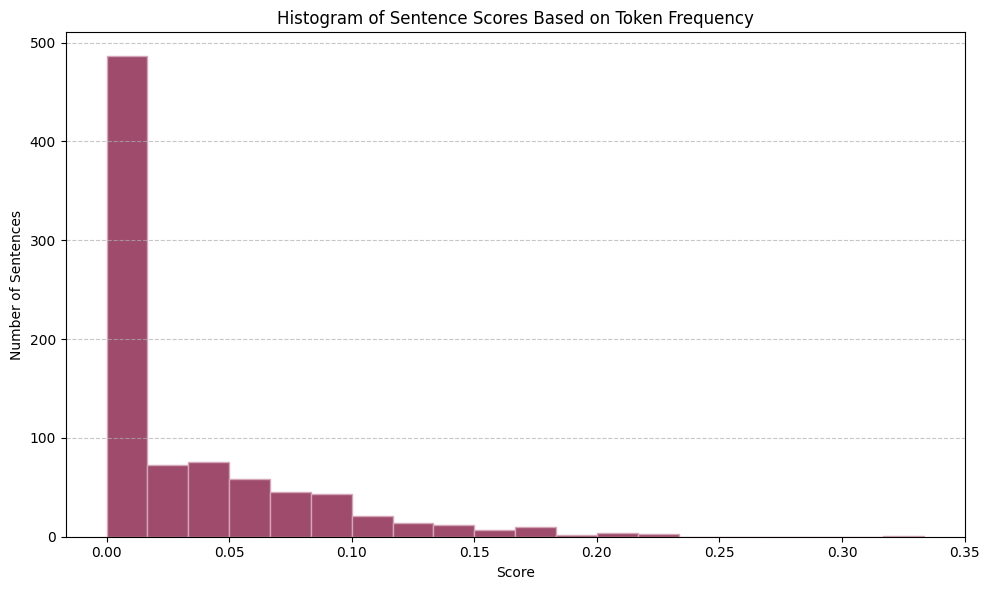

In [92]:
# Function to score sentences based on token frequency
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence if not token.is_space]
    matches = [token for token in tokens if token in interesting_tokens]
    return len(matches) / len(tokens) if tokens else 0

# Create list of sentences using spaCy
sentences = list(doc.sents)

# Create list of sentence scores using tokens
token_scores = [score_sentence_by_token(sent, [t for t, _ in top_tokens]) for sent in sentences]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, color='#9e4b6c', edgecolor="#d3a6b8")
plt.title("Histogram of Sentence Scores Based on Token Frequency")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Most common range of scores appears to be between 0.0 and 0.1


## Question 6
Q: Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

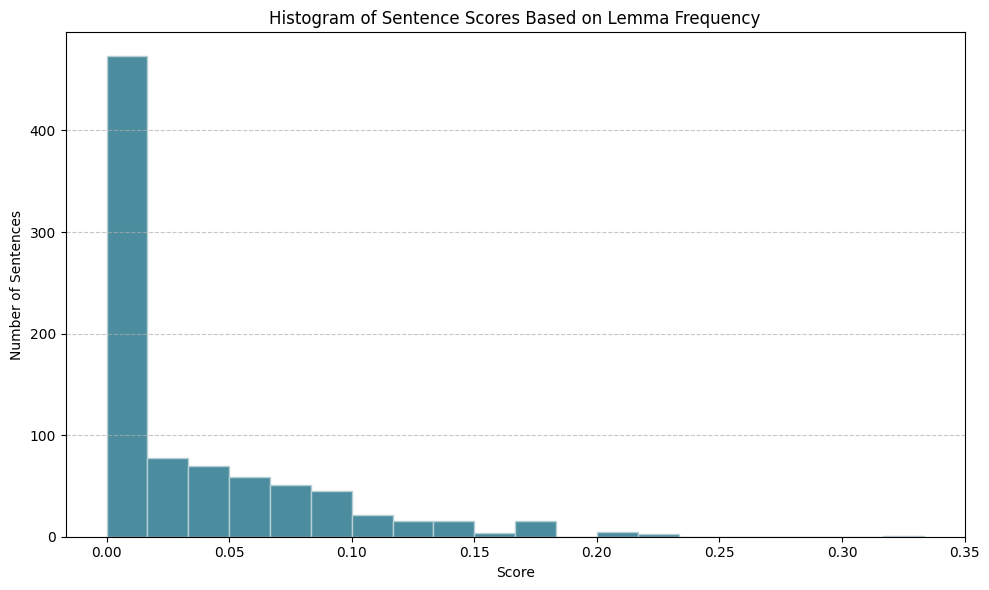

In [93]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_space]
    matches = [lemma for lemma in lemmas if lemma in interesting_lemmas]
    return len(matches) / len(lemmas) if lemmas else 0

# Create list of sentences using spaCy
sentences = list(doc.sents)

# Create list of sentence scores using lemmas
lemma_scores = [score_sentence_by_lemma(sent, [t for t, _ in top_lemmas]) for sent in sentences]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='#4b8d9e', edgecolor="#b7ced4")
plt.title("Histogram of Sentence Scores Based on Lemma Frequency")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Question 7
Q: Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.171
* Cutoff Score (lemmas): 0.182

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [94]:
# Calculate cutoff scores
cutoff_token = np.percentile(token_scores, 99)
cutoff_lemma = np.percentile(lemma_scores, 99)

# Print cutoff scores
print(f"Cutoff Score (tokens): {cutoff_token:.3f}")
print(f"Cutoff Score (lemmas): {cutoff_lemma:.3f}")

# Filter sentences based on cutoff scores
summary_sents = [s for s, score in zip(sentences, token_scores) if score > cutoff_token]

# Count filtered sentences
print("Number of sentences:", len(summary_sents))


Cutoff Score (tokens): 0.188
Cutoff Score (lemmas): 0.190
Number of sentences: 8


## Question 8
Q: Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [95]:
# Create an empty list to hold summary sentences
token_summary_sentences = []

# Loop through sentences and scores, adding only those above the cutoff
for sent, score in zip(sentences, token_scores):
    if score > cutoff_token:
        token_summary_sentences.append(sent.text.strip())

# Join the selected sentences into a single summary string
token_summary = ' '.join(token_summary_sentences)

# Print the summary
print(token_summary)

OK, but how does a neural net like this “recognize things”? What about for an (artificial) neural net? So how does neural net training actually work? How about something like ChatGPT? And then there’s the representation in the neural net of ChatGPT. But how can the neural net use that feedback? So what does this mean for things like ChatGPT and the syntax of a language like English? Then train a neural net to generate text that’s “like this”.


## Question 9
Q: Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [96]:
token_summary_doc = nlp(token_summary)
print(f"Polarity score of token summary: {token_summary_doc._.polarity:.3f}")
print(f"Number of sentences in summary: {len(token_summary_sentences)}")

Polarity score of token summary: -0.037
Number of sentences in summary: 8


## Question 10 
Q: Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [97]:
# Create an empty list to hold the lemma-based summary sentences
lemma_summary_sentences = []

# Loop through sentences and their lemma scores
for sent, score in zip(sentences, lemma_scores):
    if score > cutoff_lemma:
        lemma_summary_sentences.append(sent.text.replace("\n", " ").strip())

# Join the selected sentences into one summary string
lemma_summary = ' '.join(lemma_summary_sentences)

# Print the summary
print("Lemma-Based Summary:")
print(lemma_summary)

Lemma-Based Summary:
OK, but how does a neural net like this “recognize things”? What about for an (artificial) neural net? So how does neural net training actually work? And current neural nets—with current approaches to neural net training— specifically deal with arrays of numbers . How about something like ChatGPT? But how does one actually implement something like this using neural nets? And then there’s the representation in the neural net of ChatGPT. But how can the neural net use that feedback? Then train a neural net to generate text that’s “like this”.


## Question 11
Q: Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [98]:
lemma_summary_doc = nlp(lemma_summary)
print(f"Polarity score of lemma summary: {lemma_summary_doc._.polarity:.3f}")
print(f"Number of sentences in summary: {len(lemma_summary_sentences)}")

Polarity score of lemma summary: -0.008
Number of sentences in summary: 9


## Question 12
Q:  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?  Answer in this Markdown cell.  


Polarity score of article: 0.096  
Polarity score of token summary: -0.037  
Polarity score of lemma summary: -0.008 

There is a noticeable difference between the polarity of the full article and the polarity of the two summaries. The original article has a slightly positive sentiment overall, while both the token-based and lemma-based summaries are slightly negative.

The summaries are made from just a small chunk of the full article. I'm not surprised that eight to nine sentences of mostly buzzwords fail to capture the overall sentiment of an 855 sentence article.

## Question 13
Q: Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?  

I think they’re equally bad. Honestly, they don’t tell you anything. They feel more like an extended version of the title than an actual summary of the article. 